# Perform a looping with the quadrotor

# Goal of the project

The goal of this project is to control a 2D quadrotor to get it to perform acrobatic moves. The controller will be designed using an SQP solver.


## 2D quadrotor

The quadrotor is depicted in the following figure
<img src='quadrotor.png' width="300">


The quadrotor model is written as
$$\begin{align}
\dot{p_x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\
\dot{p_y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $p_x$ is the horizontal and $p_y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $x = [p_x, v_x, p_y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines the problem and provides all the useful information about the robot and methods to simulate and animate it as shown below.

You can access the different parameters of the model in the following way:

In [4]:
import quadrotor

print("Mass    =", quadrotor.MASS)
print("Length  =", quadrotor.LENGTH)
print("Inertia =", quadrotor.INERTIA)
print("Dt      =", quadrotor.DT)
print("state size   =", quadrotor.DIM_STATE)
print("control size =", quadrotor.DIM_CONTROL)

Mass    = 0.5
Length  = 0.15
Inertia = 0.1
Dt      = 0.04
state size   = 6
control size = 2




## Part 1 - Setting up the trajectory Optimization (50 points)
1. Discretize the system dynamics using the Euler method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. We would like the quadrotor to perfom a looping. Find and implement a suitable cost function to perform a looping and add constraint to maintain the thrust of each rotor between $0$ and $10$. Solve the problem using your own implementation of a SQP with a large horizon to check that you can do a looping.
3. Show plots of all the states and controls of the robot as a function of time.

## Part 2 - Model predictive control (MPC) (50 points)
1. Use the trajectory optimization method from Part I to design a MPC controller and test it using the simulator below. In particular, verify that it can handle perturbations by calling the ```quadrotor.simulate``` function with ```disturbance = True``` (when setting disturbance to True, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state anc control evolution.
2. Explain your intended design, including the cost function and found control law

The ```quadrotor.simulate``` function takes as an input an initial state, a controller, the number of discrete time steps and a boolean value to indicate the presence of perturbation. The controller has to be a function taking as an input a state and time index and outputting a control vector.

To visualize the trajectory, use the ```quadrotor.animate_robot``` function
and show the animation.

## Bonus (10 points)
Add a state constraint to perform the looping while maintening a positive altitude. Use the origin as an initial state.

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython

def controller(x, t):
    return np.zeros(2)

x_init = np.array([0, 0, 0., 0 ,0, 0])
horizon_length = 100
t, state, u = quadrotor.simulate(x_init, controller, horizon_length, disturbance=True)
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAMjRtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAR
JGWIhAA7//73Tr8Cm0WXagOSVwr2yqQmWblSawHypgAAAwAAAwAAAwAAEflwsC7KIS5kkAAAAwAT
MALeAaoBVgGFPzkDRP3R4AERI/cBNkGx9FZhgpDIf0VhomFmALSJYUWHreQyZfuz7RzJ0Ha6IuCb
o11Svbkf7mr9Q6uQqy6dvN9P0k2ZxUioa7YqApDwfTslU58J0+DJUY0o+Wv4z4njWLIv4/uIspot
fnsI4vj+1ld72j6Q/eeEHONo+nZh7p8upEM0pOgjT6zjCEIhgRTXr39KN3jGsREEG3WP9iIqhMpc
g4MvufkUcYY+XWlDu3M8aYfc5m86RVe/RWPZyvyZccWXyYyvr1ZTIZ9kdb9/QvvmvQNJarDWHY68
ko6lD0/wV5wwIJg13zuuI6YsiJycewEx2qvKYiF3zOpPIFJEj4Bc1MT4b1Y/futOueeENhQGwEzV
T9gUVmfFgTSW3gYuWFXzuSVaMq1imGJTsoG8AWCt8prhUkXesAS3yzr2SPbXt15V1kRJX5xMW1e4
3xaI7p3o1o36zYnHIiBryP8wXcKoEheOGQta91JxJm+DwxVqqu9vk48e1d2jH7aO0ibqsT2b/qz7
oNPvyeIScaFefVJNDJY1OfyvSF2Htr4p4wtHxX3HaPIDVe6n4Pcoo/9sZ+nB61KHNcDxWxRP1Hx7
VV5QkudM2W5WhNcyFXMMPd97EA32BXDqBcJctYky35tVgkvzmRi8It+HVLUtophb70XvO5RJ7SWb
qBNqt1UiICfHduuEi3fqkotEHeFmv/l+ScnP07kSLXCe4WYjDczseY/c4vSTRR95J8M9V2/TGcAx
LQ3PrLHs2GMPnZEJfxoC+wBYhBAypi/5y9xMI1ucvHymIu5d422uAoHIKPUzaUs+EoGJWAKSh7sA
/1MVNHQEdV8PWu0E9+vAQ1FB+VpOqRzSPpU8ZTdoAAIvMWTsByQBXuxZMJ/c3P2rJL+f4WEslJkc
fBoCD2RrYI0eslegFuqp+eZpzbnFE2wQlSIvEpU1QqWkVxhMlGcSHSzbW+iHaVoC8trBPj/y5/fq
YLXy9Gc/rr+fg763kvZdpYjcMbKr+PesT2VlYfhf/paKZ/6rbMUyg/3l94o4N1U6fqIQ2A8cJcMS
jmJTMQMf53RvdM676ssxgQWjinv4UBSVlM2HlP2hmrjOib7PL6IYcfLsz8F0bT75WJBJR5xpEgKr
YYLKF4nbNAFm2Iv5DeWye1Z19x/OXamNU3t8byrOJV9DnkWy8EjN4OvOecWCfqXrT1JUupzyGGuf
98JBCQDfFSCf0AvNf8oioizbTiyWPe25N/eaQuP0ttNaG04vIweu9qQuS9ZF0tEM1AnmHtFaF+f1
qPtR564Lsuu9NFSO12cAAAMAAAMAEOj083G8FoC7gEbW4S72HUCLAXoPxCTnqv59dvbktYOF8yA1
jomJLMj7MUAylaLZpOF7LDRZg/vSJu5aIR9X6K42YzBCIpFwlfgceGoKyvo2WpfPfb7xhDMHGMUO
d0mePX4JdHEUWTF+0MbrZvi0UHONv1pDkeb3RcnReUTTLDaxvWavrZFn2M2JiVy2kXTcpIki9KrI
faunc0hgHKB1AFjGgo8Fc/0SqQhoZKukyI0ZzAzgDWf0kmUav2taZrsTeD7I/05szlMoP8uMbrDV
WSRYA6y5NTeBVD6tYmtFlSdEI3CIdBLDTmpRvofObv/swXc0hRXlek8zWQdfbCEuP7IZTLd3liHu
X2ryNA3adXmoQEfTeK+kUIP3ANaNmeR+yI9zFixZ3Lf+EdesoWTIf9cf98hSVX+RnC1TVfkKTmcn
nUi8DXTPqSWMS7jse//Ok/nDS50KglRHpaqZ4jgkF/fwY3JqmfpJ6J0G6utC0n/nW5LCX8M7+zvA
JUOltmDAW6wqwRLcpZUAhD+qC7fMn0PwZQGPztbsN2EnHcNYy6/SGgcD5DMIGRgBuI13INDupplr
7v88MCLEWCHnb6PVQCUiRwK3rs3BN6QcVCntdbdx3nHfHgM0JmgYF+ORzwIK/80Mn2wnkTPAmt1J
ZswmJ1FW5bULSK7o9a6KnzqPt6iVN0nA2eMKfKOSmg55BqAQd4Z1Rs+xfxDL46ftcrA9ipc8rwG8
h2XcMiMaK6WG7Zr32otrFm/mqWeJtkBLEQ6FAYFX9FQanHJIi5iwBMn6XSbQLoQesDqOQqulK9ee
meoIA5P+vmjSWH5wRM/mF1/AsK3fDZQskHRtWHaoawr8WYz2/KI8Ay66uR/ZKjtryEaZKU7/hw7h
GJ0amTN8DPyvXqgYT68UwH7/LXd5sB+JFV/6xTKo6BmCnHH07vPUodEg30zHhZhD4G+ZzfItN0SX
SJSlC67PIV9fBdSVP/TAE1zYFARUVDWb4ZGrIfaK98UJgvo5OEsmE6BxeIAAcHolAwNPPfuATKSn
FE224SbKVP6wGUrDX/15hKQM59MkhwezEOayMnkV/4fH+xve/jZRTXK6/n+CwlY/HQ2GzxjodkqA
YnN/81/2B/WxtW/adSG+eAPRKG6460hcz/O2gw7tSBMxBhZa1onXm7Y+BfPK5l/2DfpS4xqbiGYA
AAMAAAMA2wAJIddYsekGLlmeQGbNnSMMaDTO04LAeRU1Pgs7JCqfHuWWGvjegZAElyvSBmwOJhs4
xOdWloDEyosvsD6oH9iEjXSWWumInjKrrw2/Qdgai/B10sGb3q4AM5oD8h+ZzRGjsv5CKxxTi9mh
bEmF9tQB4OQ8LKR6w1VTAGWDXcWYJ+Swv/ieZuQnqjT9JhE1X4Eo9ToL3w3+fY2MNCCV22qbkIf9
jNYocPx4nP49AvsfYGMnxbpc67wglyK1oYYhSmnFcjThCNdIZD+3s/5AURQ9yEFWF7aqAq3FU4uv
T7KpYJHMlecbjRhCvlki3

In [6]:
pip install qpsolvers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.8 MB/s eta 0:00:00


In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from qpsolvers import solve_qp, Problem, solve_problem
import quadrotor
import math
from scipy import sparse

In [14]:
def sequential_qp(x_init, tolerance, max_iterations, t=0, relaxed=False, adjusted_min_altitude=0):
  rho = 0.5
  alpha = 1
  f_best = np.inf
  c_best = np.inf
  x_guess = np.zeros((m,1))
  x_guess[0:6,0] = x_init
  lambda_guess = np.zeros((n,1))
  mu_guess = np.zeros((o,1))
  build_cost_matrices(t)
  build_inequality_matrices(relaxed, adjusted_min_altitude)

  cost_history = []
  alpha_history = []
  violation_history = []
  optimal_iterations = 0
  for k in range(1,max_iterations):
    alpha = 1
    accept = False
    build_constraint_matrix(x_guess, x_init)
    problem = Problem(P, P@x_guess + Z, H, J - H@x_guess, G, g, lb=None, ub=None)
    solution = solve_problem(problem, solver="cvxopt")


    step_x = np.array([solution.x]).T
    pl = np.array([solution.y]).T
    step_mu = np.array([solution.z]).T

    while not accept:
      if compute_cost(x_guess + alpha * step_x) < f_best:
        f_best = compute_cost(x_guess + alpha * step_x)
        accept = True
      if constraint_violation(x_guess + alpha * step_x, x_init) < c_best:
        c_best = constraint_violation(x_guess + alpha * step_x, x_init)
        accept = True
      if accept:
        break
      alpha = alpha * rho
      if alpha < 1e-5:
        break

    cost_history.append(f_best)
    alpha_history.append(alpha)
    violation_history.append(c_best)

    if alpha < 1e-5:
      optimal_iterations = k
      break

    x_guess = x_guess + alpha * step_x
    lambda_guess = (1-alpha)*lambda_guess + alpha * pl
    mu_guess = (1-alpha)*mu_guess + alpha * step_mu

    gradient_lambda = get_gradient_lambda(x_guess, x_init)
    gradient_state = get_gradient_state(x_guess, lambda_guess, mu_guess)
    gradient_mu = get_gradient_mu(x_guess)

    if np.all(np.abs(gradient_lambda) < tolerance) and np.all(np.abs(gradient_state) < tolerance) and np.all(np.abs(gradient_mu) < tolerance):
      optimal_iterations = k
      break

  return x_guess, optimal_iterations, cost_history, alpha_history, violation_history

def thrust_x(i, state_vector):
  return -1 * (quadrotor.DT / quadrotor.MASS) * (state_vector[(a+b)*i+6].item()+ state_vector[(a+b)*i+7].item()) * np.cos(state_vector[(a+b)*i+4].item())

def thrust_y(i, state_vector):
  return -1 * (quadrotor.DT / quadrotor.MASS) * (state_vector[(a+b)*i+6].item()+ state_vector[(a+b)*i+7].item()) * np.sin(state_vector[(a+b)*i+4].item())

def control_coeff_x(i, state_vector):
  return -1 * (quadrotor.DT / quadrotor.MASS) * np.sin(state_vector[(a+b)*i+4].item())

def control_coeff_y(i, state_vector):
  return (quadrotor.DT / quadrotor.MASS) * np.cos(state_vector[(a+b)*i+4].item())

def state_transition_matrix(i,state_vector):
  dt = quadrotor.DT
  thrust_x_comp = thrust_x(i,state_vector)
  thrust_y_comp = thrust_y(i,state_vector)
  return np.array([[1,dt, 0, 0, 0, 0],
                   [0, 1, 0, 0,thrust_x_comp, 0],
                   [0, 0, 1,dt, 0, 0],
                   [0, 0, 0, 1,thrust_y_comp, 0],
                   [0, 0, 0, 0, 1,dt],
                   [0, 0, 0, 0, 0, 1]]);


def control_input_matrix(i,state_vector):
  dt = quadrotor.DT
  coeff_x = control_coeff_x(i,state_vector)
  coeff_y = control_coeff_y(i,state_vector)
  return np.array([[0,0],
                   [coeff_x,coeff_x],
                   [0,0],
                   [coeff_y,coeff_y],
                   [0,0],
                   [torque_coeff,-torque_coeff]]);

def constraint_matrix(i,state_vector, ref_state_vector):
  dt = quadrotor.DT
  mass = quadrotor.MASS
  if(i==0):
    return np.array([[ref_state_vector[0].item()-state_vector[0].item()],
                     [ref_state_vector[1].item()-state_vector[1].item()],
                     [ref_state_vector[2].item()-state_vector[2].item()],
                     [ref_state_vector[3].item()-state_vector[3].item()],
                     [ref_state_vector[4].item()-state_vector[4].item()],
                     [ref_state_vector[5].item()-state_vector[5].item()]])
  return np.array([[-1*(state_vector[(i-1)*(a+b)].item() + dt*state_vector[(i-1)*(a+b)+1].item() - state_vector[i*(a+b)].item())],
                   [-1*(state_vector[(i-1)*(a+b)+1].item() + thrust_y(i-1,state_vector) - state_vector[i*(a+b)+1].item())],
                   [-1*(state_vector[(i-1)*(a+b)+2].item() + dt*state_vector[(i-1)*(a+b)+3].item() - state_vector[i*(a+b)+2].item())],
                   [-1*(state_vector[(i-1)*(a+b)+3].item() - thrust_x(i-1,state_vector) - state_vector[i*(a+b)+3].item() - quadrotor.GRAVITY_CONSTANT*dt)],
                   [-1*(state_vector[(i-1)*(a+b)+4].item() + dt*state_vector[(i-1)*(a+b)+5].item() - state_vector[i*(a+b)+4].item())],
                   [-1*(state_vector[(i-1)*(a+b)+5].item() + torque_coeff*state_vector[(i-1)*(a+b)+6].item() - torque_coeff*state_vector[(i-1)*(a+b)+7].item() - state_vector[i*(a+b)+5].item())]])

def q_mat_fixed(x_dest):
  return -1*(Q@x_dest)

def q_mat(t, i):
  dt = quadrotor.DT
  w_max = np.pi**2 / (N_loop*dt)
  j = min(N_loop,t+i)
  theta_dest = w_max*N_loop*dt/np.pi*(1-np.cos(np.pi*j/N_loop))
  ang_vel = w_max*np.sin(np.pi*j/N_loop)
  px_dest = px_center + Radius * np.sin(theta_dest)
  py_dest = py_center - Radius * np.cos(theta_dest)
  vx_dest = ang_vel*Radius*np.cos(theta_dest)
  vy_dest = ang_vel*Radius*np.sin(theta_dest)
  x_dest = np.array([[px_dest,vx_dest,py_dest,vy_dest,theta_dest,ang_vel]]).T
  return -1*(Q@x_dest)

def build_constraint_matrix(state_vector, ref_state_vector):
  for i in range(1,N+1):
    j = (i-1)*(a+b)
    G[i*a:(i+1)*a, j:j+a] = state_transition_matrix(i-1,state_vector)
    G[i*a:(i+1)*a, j+a:j+a+b] = control_input_matrix(i-1,state_vector)
    G[i*a:(i+1)*a, j+a+b:j+2*a+b] = -1*np.eye(a)
    g[i*a:(i+1)*a, :] = constraint_matrix(i,state_vector, ref_state_vector)

  G[0:a, 0:a] = np.eye(a)
  g[0:a, :] = constraint_matrix(0,state_vector, ref_state_vector)

def build_cost_matrices(t):
  for i in range(N + 1):
    P[i*(a+b):i*(a+b)+a, i*(a+b):i*(a+b)+a] = Q
    P[i*(a+b)+a:(i+1)*(a+b), i*(a+b)+a:(i+1)*(a+b)] = R
    Z[i*(a+b):i*(a+b)+a, :] = q_mat(t, i)

def build_inequality_matrices(relaxed, adjusted_min_altitude):
  j_new = j.copy()
  if relaxed:
    j_new[4,0] = -adjusted_min_altitude
  for i in range(N + 1):
    H[i*c:(i+1)*c, i*(a+b):(i+1)*(a+b)] = h
    J[i*c:(i+1)*c, :] = j_new


def compute_cost(x):
  return (0.5*(x.T@P@x) + Z.T@x).item()

def constraint_violation(state_vector, ref_state_vector):
  return sum(np.abs(get_gradient_lambda(state_vector, ref_state_vector))).item() + sum(np.abs(get_gradient_mu(state_vector))).item()

def get_gradient_lambda(x_guess, ref_state_vector):
  res = np.zeros((n,1))
  for i in range(N+1):
    res[i*a:(i+1)*a,:] = -1*constraint_matrix(i,x_guess, ref_state_vector)
  return res

def get_gradient_state(x_guess, lambda_guess, mu_guess):

  def l(i, n):
    return lambda_guess[i*a+n].item()

  def myu(i, n):
    return mu_guess[i*c+n].item()

  dt = quadrotor.DT
  mass = quadrotor.MASS
  res = P@x_guess + Z
  res[0,0] += l(0,0) + l(1,0)
  res[1,0] += l(0,1) + l(1,1) + dt*l(1,0)
  res[2,0] += l(0,2) + l(1,2) - myu(0,4)
  res[3,0] += l(0,3) + l(1,3) + dt*l(1,2)
  res[4,0] += l(0,4) + l(1,4) + thrust_x(0,x_guess)*l(1,1) + thrust_y(0,x_guess)*l(1,3)
  res[5,0] += l(0,5) + l(1,5) + dt*l(1,4)
  res[6,0] += control_coeff_x(0,x_guess)*l(1,1) + control_coeff_y(0,x_guess)*l(1,3) + torque_coeff*l(1,5) - myu(0,0) + myu(0,1)
  res[7,0] += control_coeff_x(0,x_guess)*l(1,1) + control_coeff_y(0,x_guess)*l(1,3) - torque_coeff*l(1,5) - myu(0,2) + myu(0,3)
  for i in range(1,N):
    j=i+1
    res[i*(a+b),0] += -l(i,0) + l(j,0)
    res[i*(a+b)+1,0] += -l(i,1) + l(j,1) + dt*l(j,0)
    res[i*(a+b)+2,0] += -l(i,2) + l(j,2) - myu(i,4)
    res[i*(a+b)+3,0] += -l(i,3) + l(j,3) + dt*l(j,2)
    res[i*(a+b)+4,0] += -l(i,4) + l(j,4) + thrust_x(i,x_guess)*l(j,1) + thrust_y(i,x_guess)*l(j,3)
    res[i*(a+b)+5,0] += -l(i,5) + l(j,5) + dt*l(j,4)
    res[i*(a+b)+6,0] += control_coeff_x(i,x_guess)*l(j,1) + control_coeff_y(i,x_guess)*l(j,3) + torque_coeff*l(j,5) - myu(i,0) + myu(i,1)
    res[i*(a+b)+7,0] += control_coeff_x(i,x_guess)*l(j,1) + control_coeff_y(i,x_guess)*l(j,3) - torque_coeff*l(j,5) - myu(i,2) + myu(i,3)
  res[N*(a+b):N*(a+b)+6,0] += -lambda_guess[N*(a):N*(a)+6,0]
  res[N*(a+b)+2,0] += -myu(N,4)
  res[N*(a+b)+6,0] += -myu(N,0) + myu(N,1)
  res[N*(a+b)+7,0] += -myu(N,2) + myu(N,3)
  return res

def get_gradient_mu(x_guess):
  res = np.zeros((o,1))
  for i in range(N+1):
    if x_guess[i*(a+b)+6] < -j[0].item():
      res[c*i,0] = -1*x_guess[i*(a+b)+6].item() - j[0].item()
    elif x_guess[i*(a+b)+6] > j[1].item():
      res[c*i+1,0] = x_guess[i*(a+b)+6].item() - j[1].item()

    if x_guess[i*(a+b)+7] < -j[2].item():
      res[c*i+2,0] = -1*x_guess[i*(a+b)+7].item() - j[2].item()
    elif x_guess[i*(a+b)+7] > j[3].item():
      res[c*i+3,0] = x_guess[i*(a+b)+7].item() - j[3].item()

    if x_guess[i*(a+b)+2] < -j[4].item():
      res[c*i+4,0] = -1*x_guess[i*(a+b)+2].item() - j[4].item()
  return res

In [11]:
Radius = 1
l_limit = 0.0
u_limit = 10.0
min_altitude = 0.0

px_center = 0
py_center = Radius;
r=quadrotor.LENGTH

a=6 #number of states
b=2 #number of controls
c=5 #inequality constraints

tolerance = 1e-2
max_iterations = 20

Q=np.array([[200,0,0,0,0,0],
            [0,30,0,0,0,0],
            [0,0,200,0,0,0],
            [0,0,0,30,0,0],
            [0,0,0,0,300,0],
            [0,0,0,0,0,30]])
R=np.array([[0.001,0],
   [0,0.001]])
torque_coeff = quadrotor.DT * r / quadrotor.INERTIA
h = np.array([[0,0,0,0,0,0,-1,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,-1],
              [0,0,0,0,0,0,0,1],
              [0,0,-1,0,0,0,0,0]])
j = np.array([[-l_limit, u_limit, -l_limit, u_limit, -min_altitude]]).T

In [12]:
# Part 1 SQP
N_total = 250
N_loop = 100
N = 250

m = ((a+b) * (N + 1))
n = a*(N+1)
o = c*(N+1)

P = np.zeros((m, m))
Z = np.zeros((m, 1))
G = np.zeros((n, m))
g = np.zeros((n, 1))
H = np.zeros((o, m))
J = np.zeros((o, 1))


x_init = np.array([0,0,0,0,0,0]).T

x_guess, optimal_iterations, cost_history, alpha_history, violation_history = sequential_qp(x_init, tolerance, max_iterations)


def controller(x, t):
  return np.array([x_guess[t*(a+b)+6].item(), x_guess[t*(a+b)+7].item()])

t, state, u = quadrotor.simulate(x_init, controller, N, disturbance=False)
quadrotor.animate_robot(state, u)


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAijNtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAR
KWWIhAA7//73Tr8Cm0WXagOSVwr2yqQmWblSawHypgAAAwAAAwAAAwAAEflwsC7KIS5kkAAAAwAT
MALeAaoBVgGFPzkDRP3R4AERI/cBNkGx9FZhgpDIf0VhomFmALSJYUWHreQyZfuz7RzJ0Ha6IuCb
o11Svbkf7mr9Q6uQqy6dvN9P0k2ZxUioa7YqApDwfTslU58J0+DJUY0o+Wv4z4njWLIv4/uIspot
fnsI4vj+1ld72j6Q/eeEHONo+nZh7p8upEM0pOgjT6zjCEIhgRTXr39KN3jGsREEG3WP9iIqhMpc
g4MvufkUcYY+XWlDu3M8aYfc5m86RVe/RWPZyvyZccWXyYyvr1ZTIZ9kdb9/QvvmvQNJarDWHY68
ko6lD0/wV5wwIJg13zuuI6YsiJycewEx2qvKYiF3zOpPIFJD+kedXczbb/3/v3WnXPPDvwoDYElq
qHwKKzPiwJpLbvd2jesTpj8mFYxRCyYRpFT8iPR7Cnjc4w/PtHZI9ub7ryrrIiSvziYtq9xvi0R3
TvRrRv1mxOOREDXkf5gu4VQJC8cMha17qTiTN8HhirVVd7fJx49q7tGP20dpE3VYns3/Vn3Qaffk
8Qk40K8+qSaGSxqc/lekLsPbXxTxhaPivuO0eQGq91Pwe5RR/7Yz9OD1wVnmIEin6d0/2n7ff5Qk
udR2W5WhNcyFXOyrd97UA32BXDqBcJctX9U46kttH/DFJYH0hyX6vQT2C/q5r93/30LoXeFCUvZ2
UCm1QQEwWd7g6R8abZGdDHEQd4Wa/+X5Jyc/TuQ2tfAcRZiMNzOx5j9zi9JNFH3knoG9cPfXyAWv
VWp1qE8A+Wwxh87IhL7bp3FYF1ThTBCvrksq2XuJhGtzmL96zLuYDvavcqtPa8cv2zlZ81B2dwgW
FFsYA00vndeufUO8SRHevmrcbZkAt1RfU5cRk/CHqwVcAKY/lsMVfPT+5F1PwJKag+rrKjXBfnFk
1TKaJwWzHmrfEqqDG9JXoBbqqfnmac25oxnv/OtiLwQ/KaF9rZcYTJJhkheptrfRDtK0BfHGRYzT
y5/fqYLXy4QOAjxbSWN9byXsu0sSGoP8vtad+J7KysPfG/tSvVf6prNIdY0/d+3KsWap0/UQhsB4
3xZkLaaorPQMf54mtRAynBGjnLWBgsnFETVR6q/z8M/8wriqU0pKYJfaNPaONKZVm3EDfuB1SEnr
3QA8QrsI4oE86jrACzbEW1/Y68W2C4v9hVwnSOXIubF88IaZDvVUPrwYZ7DGlo+YiHGHedZQOhym
g34NrBncOawS9TYfCNoBvipBP6AXfj98hIizbRK1+y/WEVd2omVqnZNjHKkQAAhVKxG81DLCldi3
5J3QVWCmq83zVhfXmIoKKmn8veV0ncWvaoB2zqWoCLHxSjCRDlvqmv6ABCi0nSWUygh83m4IXwWk
AuNXUcWxTcJgxPtdHuZf/zGroGVUDEUfnaEFLAq+JVwjn4YNZ9Sclzx/y5rtYDHK66zBfLxFwnl2
UqvkwGHunkJJfPfb9EhExwOMUOfUmePX4JdHC3I4rRZz8sk/YaLI0pLg0zt1cwcUG5huaVO0LnRC
iCo0rVTErmvrODxBIJ3GreJ5I0x0tS5zSCwVRZEfjwFov1Y5wfolU1TeQNaIKtAJ/tpiJNikOd2n
f1GAza3znnj1/Gf3Qk7yP2/Ns6luN5+UUvgOKj9uCrR9RIWXgKf3n5LHF62iGvnGmS3TFNo8k7eV
iHAXYiqdcFrv7AXsMM3215/9AnLvACxHNa26fw1F+woNCQDRYl0oNr1jWIIYHKgy3EJf9jH4Bn8d
21qSRyryZX8ShC3Ux0DIWL7oVhshTdSKGEx6qqgRpf+4Rd2/I/la2a6i51Gk6lANCrZp2MlYV/vJ
SEs5O8npx10ZMoL/R5Dsji0gEgAAAwAAAwAAAwAAAwE659aON9Oc26mIwGT8zamyMkoUref0hoHA
+QzE9lkMbiNdyDQ7qaZaLf++cfbhK3TzrtHqqPP053UL04babt3VQo00627jvOO+PAZoUbmhcujf
iwGYLFj03thPEZhdexZDdj0Vp2Kty2oWkV3SGSgJTijul2fhOiQWZ5wyxaayGkEaPHovsbRkxTty
tn97+8M5MiDkjNCSIhdiHRgsChM+Mgg7YM43Q8IrgloGo8cYYJmxU1U1kmv7MEN6VKq2xaaiqQgn
A1wIE/JAGvPThnqiteYzJ+rHdI9umEXzIvHvzJw2imbh/O5hSIcmXZfi1ArCZ5zZ9k+/TIVQWphn
RVsFLViSf32FdghBgqyeupYxns5JmoTATAIXCYO+kFNX0scPBnADm44+PSmFS5je10FYcmKc8KIr
uMqMADHxjAbHnLcoG9CIeoUHDm6fTezNyVzYNeMONaR70F1cDRPPHNJOTCuSh9fAXr6gyTn+WVDt
4sUno0o8I6iE1MMcFipv7E+clcUuhqUSlhagvMpV26qc/9rHEx19wNsOp06OX1bNVX9Kptf9HsD6
7d85szj3jwj51zfRSBX/7rMOSjH9sXub8H/2+vsbT8SJ1ER0XH1D48boJwX4WUHzFEuJNQCTKA3B
GMFvCy3F2a+irrUo5E0C86AAAEgCnAAXMPXu8so36hvoM6cawlBwXQSdLYbC0BT3zEnqCfuGut0Q
dDoVpm7j0cvrAsGr3aQKOcLM8H8mspsK3Fgqe3NwbIjj60l0xE8ZVraG5XiyDEawa3gICIPCVP+3
7874zksrp2cvHJY0OYFpY4V23/YrUmSo82NMmRXqEsy4A0rA4DsqYhcml8+2NwSv6MCTEIVPN+WC
+QtiZp6TZya8hv/YyFNDdjPEt4Ld54S7qeGGa5mudp9hEw08jEfoDtqYM/T1GOasPL8yXlk0CiEH
PP6nyOQIpE2wkTnLjGNR9

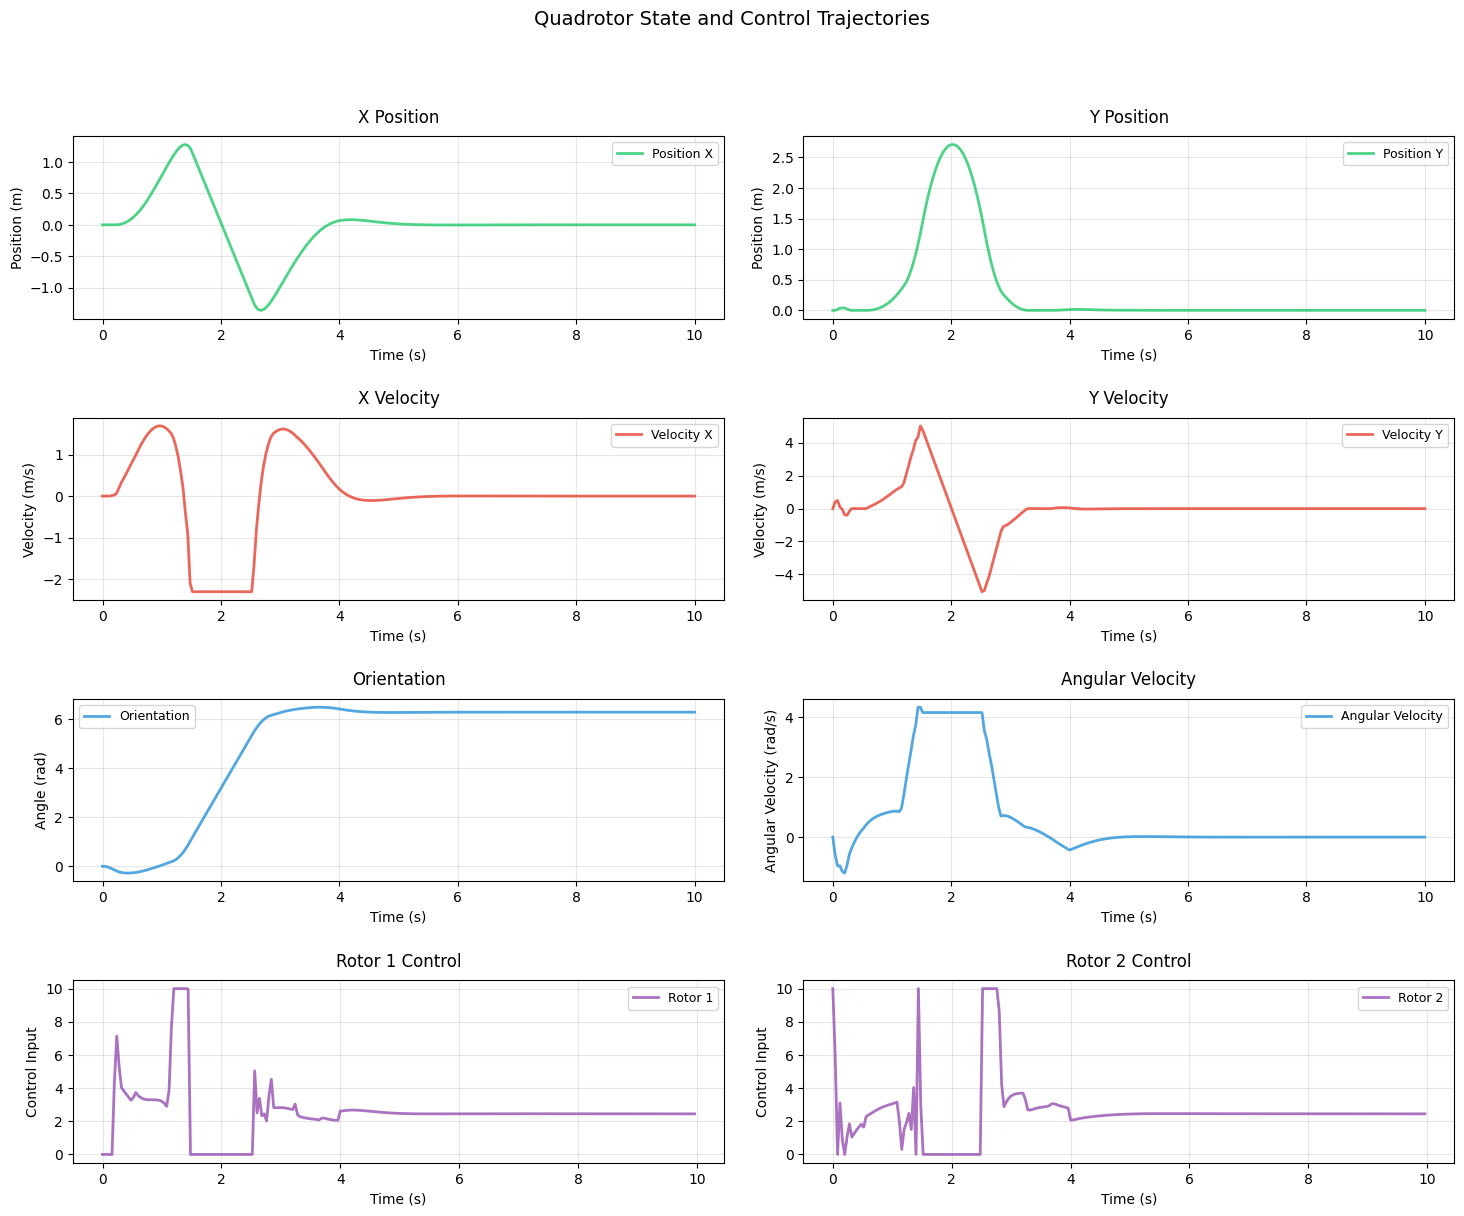

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))

colors = {
    'position': '#2ecc71',    # emerald green
    'velocity': '#e74c3c',    # pomegranate red
    'angular': '#3498db',     # peter river blue
    'control': '#9b59b6'      # amethyst purple
}

# Common parameters for all plots
plot_params = {
    'linewidth': 2,
    'alpha': 0.85
}

# Position plots
plt.subplot(4, 2, 1)
plt.plot(t, state[0,:], label="Position X", color=colors['position'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Position (m)', fontsize=10)
plt.title('X Position', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 2)
plt.plot(t, state[2,:], label="Position Y", color=colors['position'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Position (m)', fontsize=10)
plt.title('Y Position', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Velocity plots
plt.subplot(4, 2, 3)
plt.plot(t, state[1,:], label="Velocity X", color=colors['velocity'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Velocity (m/s)', fontsize=10)
plt.title('X Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 4)
plt.plot(t, state[3,:], label="Velocity Y", color=colors['velocity'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Velocity (m/s)', fontsize=10)
plt.title('Y Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Angular plots
plt.subplot(4, 2, 5)
plt.plot(t, state[4,:], label="Orientation", color=colors['angular'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Angle (rad)', fontsize=10)
plt.title('Orientation', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 6)
plt.plot(t, state[5,:], label="Angular Velocity", color=colors['angular'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Angular Velocity (rad/s)', fontsize=10)
plt.title('Angular Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Control plots
plt.subplot(4, 2, 7)
plt.plot(t[0:N_total], u[0,:], label="Rotor 1", color=colors['control'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Control Input', fontsize=10)
plt.title('Rotor 1 Control', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 8)
plt.plot(t[0:N_total], u[1,:], label="Rotor 2", color=colors['control'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Control Input', fontsize=10)
plt.title('Rotor 2 Control', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

fig.suptitle('Quadrotor State and Control Trajectories', fontsize=14, y=1.02)

plt.tight_layout(pad=2.0)
plt.show()

In [51]:
# Part 2 MPC (With disturbances)
N_total = 250
N_loop = 100
N = 30

m = ((a+b) * (N + 1))
n = a*(N+1)
o = c*(N+1)

P = np.zeros((m, m))
Z = np.zeros((m, 1))
G = np.zeros((n, m))
g = np.zeros((n, 1))
H = np.zeros((o, m))
J = np.zeros((o, 1))

x_init = np.array([0, 0, 0, 0 ,0, 0])

def controller(x, t):
  relaxed = False
  adjusted_min_altitude = min_altitude
  if x[2].item()<min_altitude:
    relaxed = True
    vy_next_max = x[3].item() + quadrotor.DT/quadrotor.MASS*20*np.cos(x[4].item()) - quadrotor.DT*quadrotor.GRAVITY_CONSTANT
    if vy_next_max > 0:
      adjusted_min_altitude = x[2].item()
    else:
      adjusted_min_altitude = 2*(x[2].item() + quadrotor.DT*vy_next_max)

  x_c, optimal_iterations, cost_history, alpha_history, violation_history = sequential_qp(x, tolerance, max_iterations, t, relaxed, adjusted_min_altitude)

  return np.array([x_c[6].item(), x_c[7].item()])

t, state, u = quadrotor.simulate(x_init, controller, N_total, disturbance=True)
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAuKxtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAR
a2WIhAA7//73Tr8Cm0WXagOSVwr2yqQmWblSawHypgAAAwAAAwAAAwAAEflwsC7KIS5kkAAAAwAT
MALeAaoBVgGFPzkDRP3R4AERI/cBNkGx9FZhgpDIf0VhomFmALSJYUWHreQyZfuz7RzJ0Ha6IuCb
o11Svbkf7mr9Q6uQqy6dvN9P0k2ZxUioa7YqApDwfTslU58J0+DJUY0o+Wv4z4njWLIv4/uIspot
fnsI4vj+1ld72j6Q/eeEHONo+nZh7p8upEM0pOgjT6zjCEIhgRTXr39KN3jGsREEG3WP9iIqhMpc
g4MvufkUcYY+XWlDu3M8aYfc5m86RVe/RWPZyvyZccWXyYyvr1ZTIZ9kdb9/QvvmvQNJarDWHY68
ko6lD0/wV5wwIJg13zuuI6YsiJycewEx2qvKYiF3zOpPIFJD+kedXczbb/3/v3WnXPPDvwoDYDtq
p+wKKzPiwJpLbwMXK0+3pj8mLHNpA9x4hcqD7wAXdVncKki71gCW+WdeyR7ahuvKusiJK/OJi2r3
G+LRHdO9GtG/WbE45EQNeR/mC7hVAkLxwyFrXupOJM3weGKtVV3t8nHj2ru0Y/bR2kTdViezf9Wf
dBp9+TxCTjQrz6pJoZLGpz+V6Quw9tfFPGFo+K+47R5Aar3U/B7lFH/tjP04PWpQ5rgeR2KJ+o+P
aqvKElzpmy3K0JrmQq5hh7vvYgG+wK4dQLhLlq/qnHelto/4YpLA+kNL/gxBYwX9R2MoCN5iLZ3f
xBtJZuoE2qBBdhnXh/rW6LbIzoY4iDvCzX/y/JOTn6dyG9r4DiLMRhuZ2PMfucXpJoo+8k86fwQV
v2gwxLQ3PrLHs2GMPnZEJfxzuNzhEaPRAaZQyqn2z/Ze4mEa3OZn5TEXcu+VE2FFwtD4xEG+z4Sg
YLfAnpC2AoADzD7Sol04h9Dxd8TIOypTPgwx0x8jkE6qNL7C3ICAAAADA2964bgAAUD1Q7wcgrCJ
Xez7YGuG+qDEB8GgIPZGtggx+Bvpt86qn55mnNubYTbBCVIi86lTVCpaRXGEyU5xIdLNtb6IdpWg
L3OsE+P/Ln9+pgtfL1mHg17euc91cZey7SxIgXWVX8e9YnsrKw+BT/S0Uw/1W2YzzM8eX3Cu5GVT
p+ohDYDxwiwxbNF2TvFosNINDWh6c18uctYGCycURXVJWSefZP/iFcVSmlm9Kfa3tQUR+1Bn3H/y
XRqkKnYETc4ddhgd7nXT4vYt+W1j63SlwjBcXtH85dqY1Te3xvKs4lb0OqxsOVbBB0WZienp9+pe
tPUlS6mPIX4X/3wkEJAN8VIJ/QC8O/yiKiLNtOLJZATltjlXdAfUZSZ0wB6G8jB8GJNlZaLp9Dt2
bOmHFLDqtWnqgr/m+as9jns4rWqFbarViwSHHG3YAAADAAAMe3c6PWvnzZMAOYXhU54AYGwBCtZ5
H8BlERU3jjbGDFF8yA1jomJLMj7LLyylaLZpOF7LDRZg/vSJu5aIR9X6K42YzBCIpFwk8x51VhWj
vo2WpfPfb7xhDK+uMUOd0mePX4JdHDlgTWY78+sx3i0UHONvx0nUEzjy8gvfkGmWG1jes1fWyLPs
ZsTErWYOOpImc//8mrIfaunc0hgHKB1AFjGUx78n+iVSFEvlvuoBVwLackixDV+1rTNdiRwfZIAg
xtGXAoT/GN1hqrJIszgfk1PG2ij0xKMwguHRCNwiHQSk05qUbn/rXwvzKfuaQ0qBQrMkd1Z1u8/9
CNkMpm3mBrTuX144O/N6dXmoPx/DUn7BmvemqYcF2Xj/dT6DVDkAFvb/COvWTAoMP+hCsC/z7r81
QC8yZR3pLBBmqzeCT0BmlznobMw6e/9Q69EIgVOTfTXcTm6Kbb+9Sq6JwB/wMNqZOpaLuS8IBdi/
+fbj0WftfNHyQDnrF+kKdA8FPid7UAsQDfY4FfAJegEKRmnHJ8XyXc0/vw+kyG+/cGxo40efV54b
8TMk5opsVXRxrGXX6Q0DgfISKKcpWwLBw4mOEnkCVEH/voJxYiRANbfR6p2RqGxFOizibQtHGlfX
NHf2YO84748BmhK7J0bHG/FgMwWLGHfbCeG20reroVHUcQx3KrctqFpFd0eZHn9ywTm0cDxXVm7b
icK98qWJR4/i4KPnfx6L7G0ZkUaxueOtX3XTZ2wckZoIAsW58tKsiSYjC5EKQV2KpZ4m2QYDGksH
fgV/0VAlIJd/VcX5TdkG9FtAuVcnq5jqfPhpuj52rMXKbXmMyf7oNG7r59lhj9MaFbvhsoYotv+G
r5RlPD+q1AtCu6wBgj8GVjaA5iomoToVNWBd6SOy4SJLTU76hL5gqZbj68Uj0RX1ymjMB+RLPPXc
/Fax6V/vWF83+zGrk30Y5zIjycMeLVYXxvvHpEpShddnj8vgy1w+19tFS4Uz45CgyyYPniZWQ+z6
i/UQ8vrMcC0bNccu2bx8aDW2eyVJe3QOpy3cJTV0NT1i9lKn9YDKVhvImnx1+DNpfTN8itEHdTwJ
wGQVs2k03419OIR8dlp2DiGU6dRLR7753OJJ/Qvfxea0RhT+0w8+WYU4/0A8G1x5mxY6C2frEoUN
86AfP7OJ4acwnVPKFsQt31goRen44KnCKEdsNBS2P38yIXPi/NpSj8taFRi7SsyTsPyp4V+0D/9j
zbqKWiFW8WDTOxRlaR4ambaPfSwS/mYDlo39oMJFPadr0tsCfNyAYw8sDEUpnYtyBuP1pjpiJ4yt
zSDSVQde0g/+gUBtaPxWpjClvqCZrRrFRIioymgb0wvZoWxJhhgaMdS9J8MmwPXTfj9AK6cahLJH
LlpGQ0KvSo7ZcGpgoe6beSy7j3fnxckuZ5NowcLP92bMlwaguG7s59HqpbLmjaydVhi4Q1VB5lDD
EKPq2YUeueQ0Lb5tKeFoB

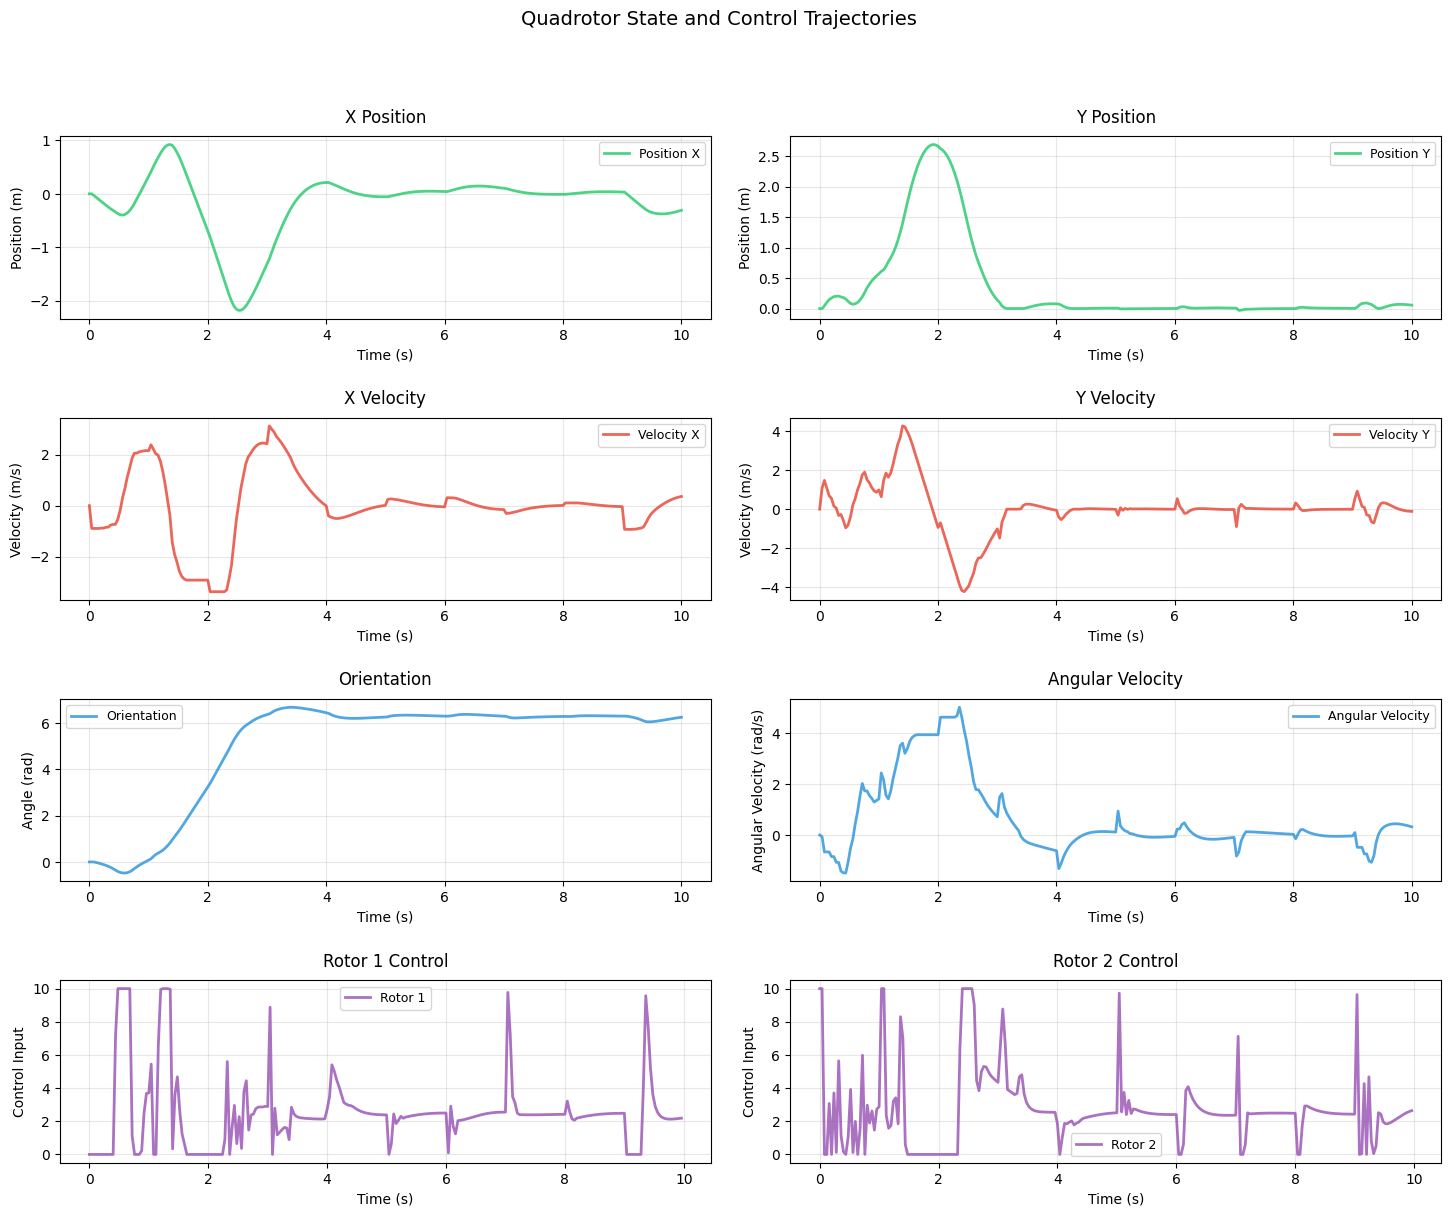

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))

# Define professional color scheme
colors = {
    'position': '#2ecc71',    # emerald green
    'velocity': '#e74c3c',    # pomegranate red
    'angular': '#3498db',     # peter river blue
    'control': '#9b59b6'      # amethyst purple
}

# Common parameters for all plots
plot_params = {
    'linewidth': 2,
    'alpha': 0.85
}

# Position plots
plt.subplot(4, 2, 1)
plt.plot(t, state[0,:], label="Position X", color=colors['position'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Position (m)', fontsize=10)
plt.title('X Position', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 2)
plt.plot(t, state[2,:], label="Position Y", color=colors['position'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Position (m)', fontsize=10)
plt.title('Y Position', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Velocity plots
plt.subplot(4, 2, 3)
plt.plot(t, state[1,:], label="Velocity X", color=colors['velocity'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Velocity (m/s)', fontsize=10)
plt.title('X Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 4)
plt.plot(t, state[3,:], label="Velocity Y", color=colors['velocity'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Velocity (m/s)', fontsize=10)
plt.title('Y Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Angular plots
plt.subplot(4, 2, 5)
plt.plot(t, state[4,:], label="Orientation", color=colors['angular'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Angle (rad)', fontsize=10)
plt.title('Orientation', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 6)
plt.plot(t, state[5,:], label="Angular Velocity", color=colors['angular'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Angular Velocity (rad/s)', fontsize=10)
plt.title('Angular Velocity', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Control plots
plt.subplot(4, 2, 7)
plt.plot(t[0:N_total], u[0,:], label="Rotor 1", color=colors['control'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Control Input', fontsize=10)
plt.title('Rotor 1 Control', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(4, 2, 8)
plt.plot(t[0:N_total], u[1,:], label="Rotor 2", color=colors['control'], **plot_params)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Control Input', fontsize=10)
plt.title('Rotor 2 Control', fontsize=12, pad=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Add a main title to the figure
fig.suptitle('Quadrotor State and Control Trajectories', fontsize=14, y=1.02)

# Adjust layout with better spacing
plt.tight_layout(pad=2.0)
plt.show()